# Imports

In [1]:
import yfinance as yf
import pandas as pd

from fbprophet import Prophet

from fbprophet.plot import plot_plotly
import plotly.offline as py

from fbprophet.plot import add_changepoints_to_plot

## Functions

In [75]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

# Get data from yfinance
def get_historical_yfinance(tickers):
    # Select requested tickers
    tickers = yf.Tickers(" ".join(tickers.keys()))
    # Return dataframe for all tickers
    return tickers.history(period="1mo", interval="1d", start=None, end=None, actions=True, rounding=True)

# Add extra info
def set_change_label(x):
    if x > 0:
        return 1
    else:
        return 0

def add_historical_extra_info(df):
    for ticker in my_tickers.keys():
        df['Change', ticker] = df['Close', ticker].diff()
        df['Change_Percent', ticker] = df['Close', ticker].div(df['Close', ticker].shift(1))*100-100
        df['Change_Label', ticker] = df['Change', ticker].apply(set_change_label)
    return df

# Plot one ticker
def plot_one_ticker(df, stock_label):
    hist_one = hist.iloc[:, hist.columns.get_level_values(1)==stock_label]
    #Delete level 1 column labels
    hist_one = hist_one.T.reset_index(level=1, drop=True).T
    display(hist_one.tail())
    display(hist_one['Change_Percent'].plot(figsize=(15,6)))
    #Extra info
#     print("Change Mean:", hist_one['Change'].mean())
#     print("Change Sum:", hist_one['Change'].sum())
#     print("Change Percent Mean:", hist_one['Change_Percent'].mean())
#     print("Change Label:", hist_one['Change_Label'].mean())
    
# Prepare dataset for Prophet
def prepare_dataset_prophet(df, ticker, column):
    # column = [Close, Dividends, High, Low, Open, Stock Splits, Volume, Change, Change_Percent, Change_Label]
    hist = pd.DataFrame({'ds': df.index, 'y': df[column, ticker]})
    return hist

# Make Prophet model
def make_prophet_model(df):
    model = Prophet(growth='linear', ## growth = ['linear', 'logistic'] # Type of regression
                    yearly_seasonality=False,
                    #weekly_seasonality=True,
                    daily_seasonality=False, 
                    #seasonality_mode='additive', ## seasonality_mode=['additive', multiplicative']
                    #mcmc_samples=300, ## mcmc_samples = 0 # Uncertainly seasonality
                    #interval_width = 0.8, ## Size of yhat upper and lower
                   )
    #model.add_country_holidays(country_name='US')
    model.fit(df)
    return model

# Forecast the future
def forecast_prophet(model, days, include_history):
    future = model.make_future_dataframe(periods=days, freq='D', include_history=include_history)
    future = future[future.ds.dt.dayofweek<=4] # Take out Sat and Sun
    forecast = model.predict(future)
    return forecast

# Plot forecast
def plot_forecast(model, forecast, stock_label):
    fig1 = model.plot(forecast) # .tail(days_to_predict-weekend_days)
    fig1.suptitle(stock_label + ": " + my_tickers.get(stock_label), fontsize=14)
    a = add_changepoints_to_plot(fig1.gca(), model, forecast) # Add changepoints
    #fig2 = model.plot_components(forecast)

## Variables

In [79]:
my_tickers = {'ATVI': 'Activision',
              'ADS': 'Adidas',
              'GOOG': 'Alphabet',
              'MSFT': 'Microsoft',
              'AMZN': 'Amazon.com',
              'TEF': 'Telefonica',
              'CHFS': 'CHF_Solutions',
              'ASTC': 'Astrotech'
              }

#stock_label = 'AMZN'

predict_column = 'Change_Percent'

days_to_predict = 7

## Main

[*********************100%***********************]  8 of 8 completed


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 ATVI Activision 
 Look at 


,ds,yhat
20,2020-03-30,-0.940738
21,2020-03-31,2.907790
22,2020-04-01,1.588982
23,2020-04-02,0.736366
24,2020-04-03,1.644599


 ADS Adidas 


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 Look at 


,ds,yhat
20,2020-03-30,-1.659501
21,2020-03-31,13.041150
22,2020-04-01,-1.468830
23,2020-04-02,5.321984
24,2020-04-03,11.770064


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 GOOG Alphabet 
 Look at 


,ds,yhat
20,2020-03-30,-4.340609
21,2020-03-31,5.598693
22,2020-04-01,0.820450
23,2020-04-02,0.947384
24,2020-04-03,2.363524


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 MSFT Microsoft 
 Look at 


,ds,yhat
20,2020-03-30,-4.920385
21,2020-03-31,8.190864
22,2020-04-01,1.782903
23,2020-04-02,2.271216
24,2020-04-03,4.195101


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 AMZN Amazon.com 
 Look at 


,ds,yhat
20,2020-03-30,-1.001864
21,2020-03-31,4.809375
22,2020-04-01,1.438206
23,2020-04-02,0.879939
24,2020-04-03,2.036205


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 TEF Telefonica 
 Look at 


,ds,yhat
20,2020-03-30,-4.095837
21,2020-03-31,8.799447
22,2020-04-01,1.636204
23,2020-04-02,0.697350
24,2020-04-03,1.266988


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 CHFS CHF_Solutions 
 Look at 


,ds,yhat
20,2020-03-30,14.887043
21,2020-03-31,1.208066
22,2020-04-01,9.622266
23,2020-04-02,16.820446
24,2020-04-03,14.165316


 ASTC Astrotech 


INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


 Look at 


,ds,yhat
20,2020-03-30,33.840248
21,2020-03-31,52.214861
22,2020-04-01,103.065134
23,2020-04-02,35.939558
24,2020-04-03,41.212643


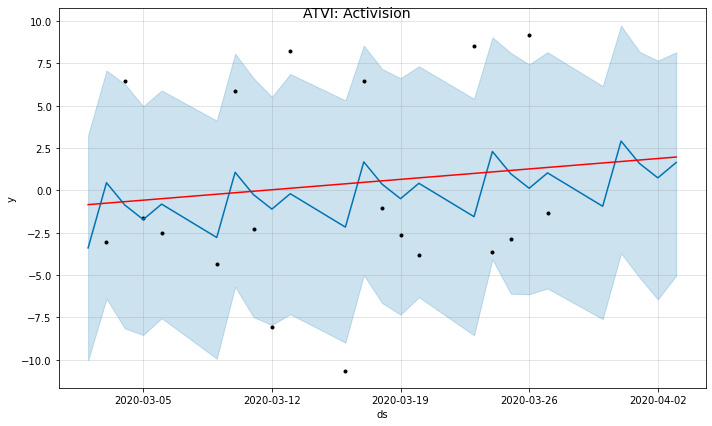

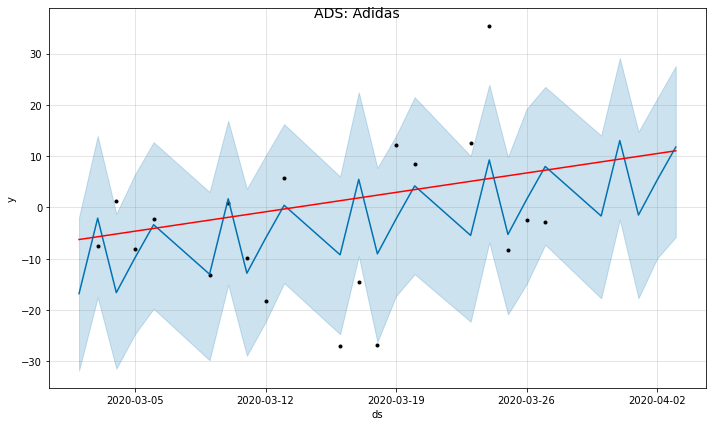

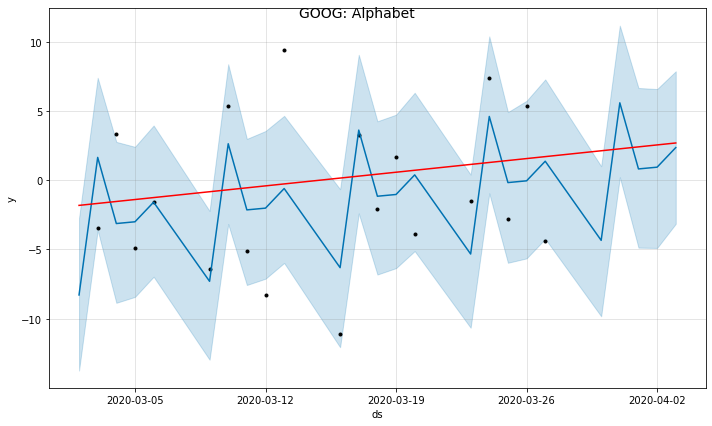

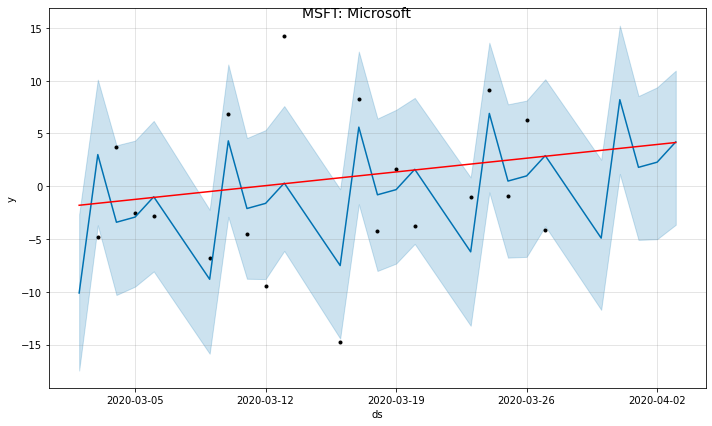

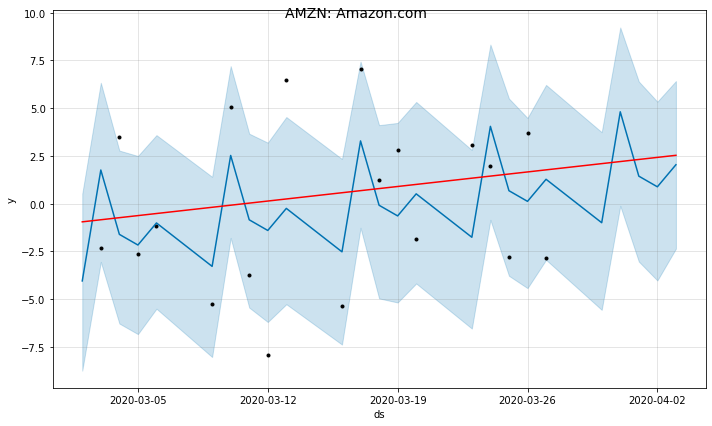

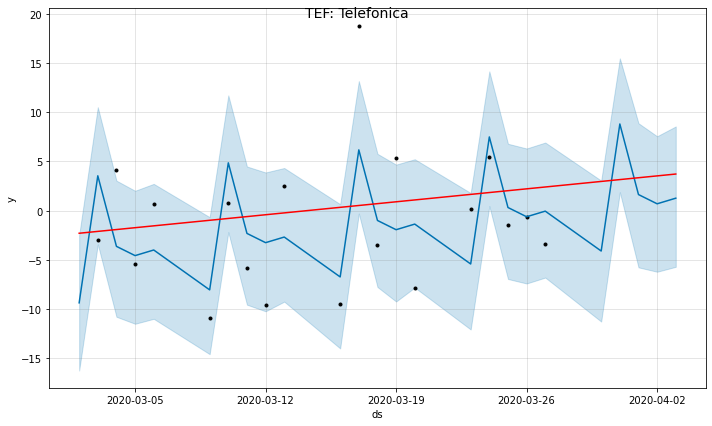

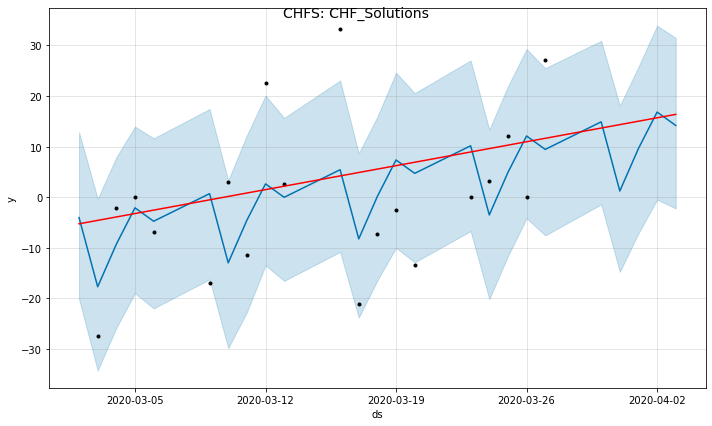

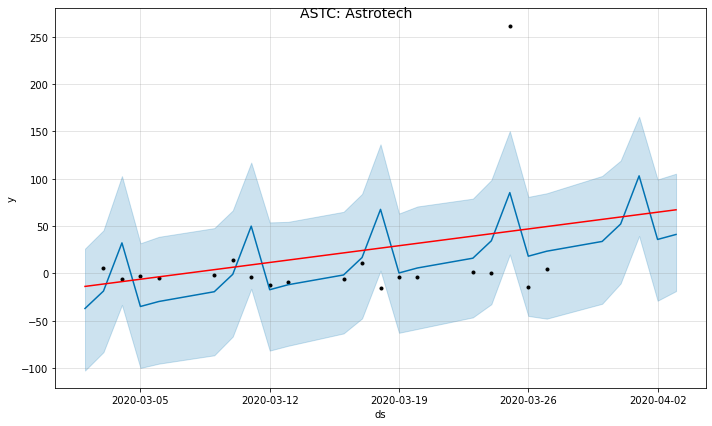

In [80]:
"""Get data from yfinance"""
hist = get_historical_yfinance(tickers=my_tickers)
"""Add extra info"""
hist = add_historical_extra_info(df=hist)
"""Plot one ticker"""

for stock_label in my_tickers:
    print(color.BOLD, stock_label, my_tickers.get(stock_label), color.END)
    #plot_one_ticker(df=hist, stock_label=stock_label)
    """Prepare dataset for Prophet"""
    hist_one_prophet = prepare_dataset_prophet(df=hist, ticker=stock_label, column=predict_column)
    """Make Prophet model"""
    model = make_prophet_model(df=hist_one_prophet)
    """Forecast the future"""
    forecast = forecast_prophet(model=model, days=days_to_predict, include_history=True)
    """Plot forecast"""
    if forecast.yhat.max() > 0:
        print(color.GREEN, 'Look at', color.END)
        display(forecast[['ds', 'yhat']].tail())
        plot_forecast(model=model, forecast=forecast, stock_label=stock_label)
    else:
        print(color.RED, 'Nothing interesting', color.END, end='\n\n')